Import Libraires

In [ ]:
import pandas as pd
import seaborn as sns
import re
import plotly.express as px
import matplotlib.pyplot as plt

Import data

In [ ]:
#data Url
# url= "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online Retail.xlsx"
url = "/content/drive/MyDrive/FireHouseTest/Online Retail.xlsx"
# url = "/content/Online Retail.xlsx"
df = pd.read_excel(url)
# df = pd.read_csv(url)



In [ ]:
df.head()

,InvoiceNo,CustomerID,StockCode,Description,InvoiceDate,Country,InvoiceDate_Date,Year,Month,Time,Quantity,UnitPrice,Income
0,536365,17850,85123,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,2.55,15.30
1,536365,17850,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,3.39,20.34
2,536365,17850,84406,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,8,2.75,22.00
3,536365,17850,84029,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,3.39,20.34
4,536365,17850,84029,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,3.39,20.34


In [ ]:
def summarize_data(df):
    # Get the shape of the DataFrame
    shape = df.shape
    # Get the sum of null values for each column
    null_sum = df.isnull().sum()
    # Get a summary of the statistics for each column
    summary = df.describe()
    # Check the data types of columns
    type_data = df.dtypes


    return shape, null_sum, summary,type_data

shape, null_sum,summary , type_data= summarize_data(df)

print("shape of the data:", shape)

print("\n Sum of Null Values: \n ",null_sum)

print("\n The data types of columns: \n",type_data)

print("\n Summary Statistics: \n", summary)


shape of the data: (404613, 13)

 Sum of Null Values: 
  InvoiceNo           0
CustomerID          0
StockCode           0
Description         0
InvoiceDate         0
Country             0
InvoiceDate_Date    0
Year                0
Month               0
Time                0
Quantity            0
UnitPrice           0
Income              0
dtype: int64

 The data types of columns: 
 InvoiceNo                   object
CustomerID                   int64
StockCode                    int64
Description                 object
InvoiceDate         datetime64[ns]
Country                     object
InvoiceDate_Date            object
Year                         int64
Month                        int64
Time                        object
Quantity                     int64
UnitPrice                  float64
Income                     float64
dtype: object

 Summary Statistics: 
           CustomerID      StockCode           Year          Month  \
count  404613.000000  404613.000000  404613.000000 

### Key Points


*   The minimum value of the quantity is -80995, which indicates that some orders were cancelled and returned
*   The minimum value of the unit price is -11062.06, which may indicate an error in the data
*It looks like there are 1454 missing values in the Description column, and 135080 missing values in the CustomerID column.



In [ ]:
# Fill missing values in the Description column with 'Description not available'
df['Description'].fillna('Description Not Available', inplace=True)

Negetive_values=[]

for Val in df['UnitPrice']:
  if Val<=0:
    Negetive_values.append(Val)
print("Count of Negetive values: " , len(Negetive_values))

# Remove rows with negative unit prices
df = df[df['UnitPrice'] >= 0]
# Check the minimum value
print("Minimum Unit Price:", df['UnitPrice'].min())




/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Count of Negetive values:  33
Minimum Unit Price: 0.0




*   "All missing values in the Description column have been replaced with 'Description not available'. The negative values in the UnitPrice column have been removed."
  



In [ ]:
def extract_date_info(df):

  # Convert InvoiceDate to datetime
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

 # Extract Date ,year, month, and time
  df['InvoiceDate_Date'] = df['InvoiceDate'].dt.date
  df['Year'] = df['InvoiceDate'].dt.year
  df['Month'] = df['InvoiceDate'].dt.month
  df['Time'] = df['InvoiceDate'].dt.time

  # Calculate Income
  df['Income'] = df['UnitPrice'] * df['Quantity']

  return df
#
extract_date_info(df)

,InvoiceNo,CustomerID,StockCode,Description,InvoiceDate,Country,InvoiceDate_Date,Year,Month,Time,Quantity,UnitPrice,Income
0,536365,17850,85123,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,2.55,15.30
1,536365,17850,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,3.39,20.34
2,536365,17850,84406,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,8,2.75,22.00
3,536365,17850,84029,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,3.39,20.34
4,536365,17850,84029,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,12680,22613,PACK OF 20 SPACEBOY NAPKINS,2011-12-09 12:50:00,France,2011-12-09,2011,12,12:50:00,12,0.85,10.20
541905,581587,12680,22899,CHILDREN'S APRON DOLLY GIRL,2011-12-09 12:50:00,France,2011-12-09,2011,12,12:50:00,6,2.10,12.60
541906,581587,12680,23254,CHILDRENS CUTLERY DOLLY GIRL,2011-12-09 12:50:00,France,2011-12-09,2011,12,12:50:00,4,4.15,16.60
541907,581587,12680,23255,CHILDRENS CUTLERY CIRCUS PARADE,2011-12-09 12:50:00,France,2011-12-09,2011,12,12:50:00,4,4.15,16.60


In [ ]:
# Reorder Data frame
# Get a list of the current column names
cols = list(df.columns)

# Specify the desired order of the columns
cols = ['InvoiceNo','CustomerID','StockCode','Description','InvoiceDate','Country','InvoiceDate_Date', 'Year','Month',
        'Time','Quantity', 'UnitPrice', 'Income']

# Reorder the columns in the DataFrame
df = df[cols]

#
df.head()

,InvoiceNo,CustomerID,StockCode,Description,InvoiceDate,Country,InvoiceDate_Date,Year,Month,Time,Quantity,UnitPrice,Income
0,536365,17850,85123,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,2.55,15.30
1,536365,17850,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,3.39,20.34
2,536365,17850,84406,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,8,2.75,22.00
3,536365,17850,84029,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,3.39,20.34
4,536365,17850,84029,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,3.39,20.34


In [ ]:
df.to_csv('cleaned_retail_data.csv', index=False)

In [ ]:
#create Continet column in data set

def map_country_to_continent(df):
    # Define a dictionary to map each country to its corresponding continent
    continent_dict = {
        'United Kingdom': 'Europe',
        'France': 'Europe',
        'Australia': 'Australia',
        'Netherlands': 'Europe',
        'Germany': 'Europe',
        'Norway': 'Europe',
        'EIRE': 'Europe',
        'Switzerland': 'Europe',
        'Spain': 'Europe',
        'Poland': 'Europe',
        'Portugal': 'Europe',
        'Italy': 'Europe',
        'Belgium': 'Europe',
        'Lithuania': 'Europe',
        'Japan': 'Asia',
        'Iceland': 'Europe',
        'Channel Islands': 'Europe',
        'Denmark': 'Europe',
        'Cyprus': 'Europe',
        'Sweden': 'Europe',
        'Austria': 'Europe',
        'Israel': 'Asia',
        'Finland': 'Europe',
        'Bahrain': 'Asia',
        'Greece': 'Europe',
        'Hong Kong': 'Asia',
        'Singapore': 'Asia',
        'Lebanon': 'Asia',
        'United Arab Emirates': 'Asia',
        'Saudi Arabia': 'Asia',
        'Czech Republic': 'Europe',
        'Canada': 'North America',
        'Unspecified': 'Other',
        'Brazil': 'South America',
        'USA': 'North America',
        'European Community': 'Europe',
        'Malta': 'Europe',
        'RSA': 'Africa'
    }

    # Create a new column "Continent" and map each country to its corresponding continent
    df['Continent'] = df['Country'].map(continent_dict)

    return df

# Apply the function to the data frame
df = map_country_to_continent(df)



In [ ]:
df.head()

,InvoiceNo,CustomerID,StockCode,Description,InvoiceDate,Country,InvoiceDate_Date,Year,Month,Time,Quantity,UnitPrice,Income,Continent
0,536365,17850,85123,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,2.55,15.30,Europe
1,536365,17850,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,3.39,20.34,Europe
2,536365,17850,84406,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,8,2.75,22.00,Europe
3,536365,17850,84029,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,3.39,20.34,Europe
4,536365,17850,84029,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,2010-12-01,2010,12,08:26:00,6,3.39,20.34,Europe


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


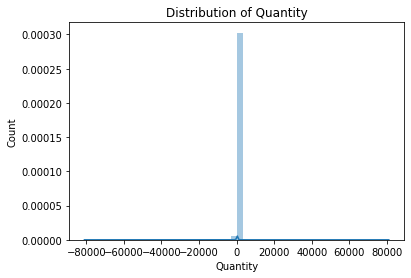

In [ ]:
# 1. Distribution of Quantity
sns.distplot(df['Quantity'], kde=True)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

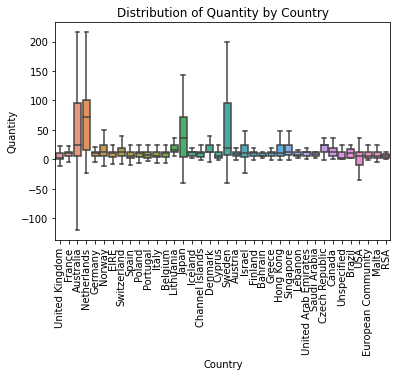

In [ ]:
# 2. Distribution of Quantity by Country
sns.boxplot(x='Country', y='Quantity', data=df ,showfliers=False)
plt.title("Distribution of Quantity by Country")
plt.xlabel("Country")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.show()

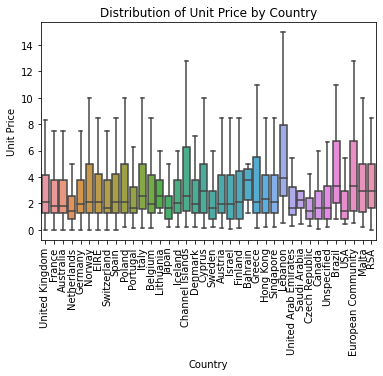

In [ ]:
# 3. Distribution of Unit Price by Country
sns.boxplot(x='Country', y='UnitPrice', data=df,showfliers=False)
plt.title("Distribution of Unit Price by Country")
plt.xlabel("Country")
plt.ylabel("Unit Price")
plt.xticks(rotation=90)
plt.show()

* The highest mean unit price can be observed in Lebanon and Bahrain, indicating similar values. Although the best selling country is the UK, it has an average unit price over 2

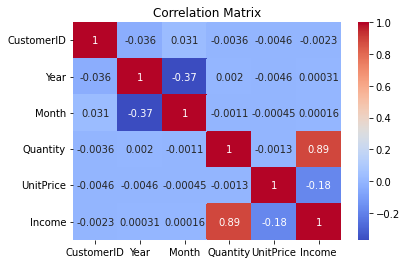

In [ ]:
# 4. Correlation Matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



*   In the case of Quantity and Income, we can see that the correlation is 0.89, which is a strong positive correlation. This means that as the quantity of products sold increases, the income also increases.

* For Unit Price and Income, we can see that the correlation is -0.18, which is a weak negative correlation. This means that as the unit price of the products decreases, the income increases, but not as strongly as in the case of Quantity and Income




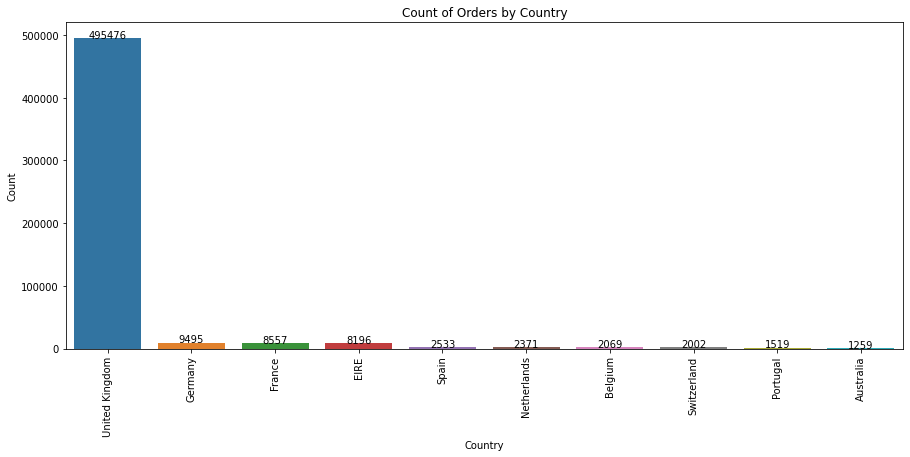

In [ ]:
# 5. Count of Orders by Country for top Ten

plt.figure(figsize=(15, 6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().iloc[:10].index)
plt.title("Count of Orders by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
for i in range(df['Country'].value_counts().iloc[:10].shape[0]):
    count = df['Country'].value_counts().iloc[:10].values[i]
    plt.text(i, count+10, str(count), ha='center')
plt.show()


* European-based countries hold a record of selling many products in this system. The best-selling country is the UK with nearly 50,000 sales. Second place goes to Germany, which has almost 1/5 of the UK's sales.

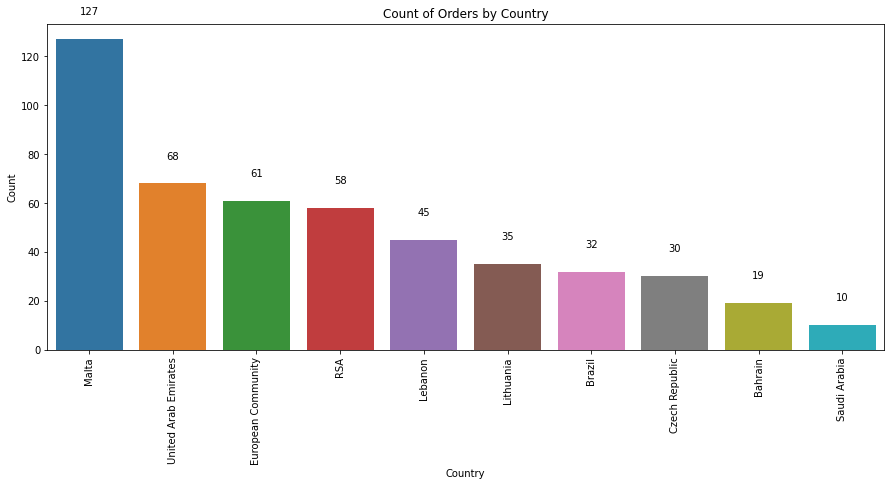

In [ ]:
# 6. Count of Orders by Country for last Ten

plt.figure(figsize=(15, 6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().iloc[-10:].index)
plt.title("Count of Orders by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
for i in range(df['Country'].value_counts().iloc[-10:].shape[0]):
    count = df['Country'].value_counts().iloc[-10:].values[i]
    plt.text(i, count+10, str(count), ha='center')
plt.show()


* According to the graph, Arabic countries have the lowest product count which are 19 for Bahrain and 20 for Saudi Arabia respectively.

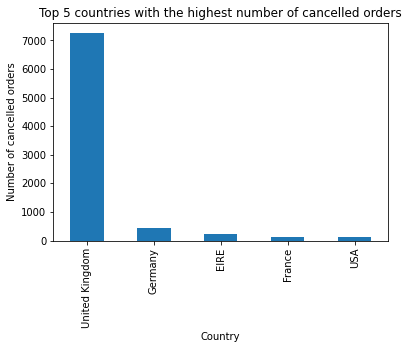

In [ ]:
#top oder caneld countries
# Extract the data of cancelled orders
cancelled_orders = df[df['InvoiceNo'].astype(str).str.startswith('C')]

# Get the count of cancelled orders for each country
cancelled_orders_count = cancelled_orders['Country'].value_counts()

# Plot the data
cancelled_orders_count[:5].plot(kind='bar')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of cancelled orders')
plt.title('Top 5 countries with the highest number of cancelled orders')

# Show the plot
plt.show()



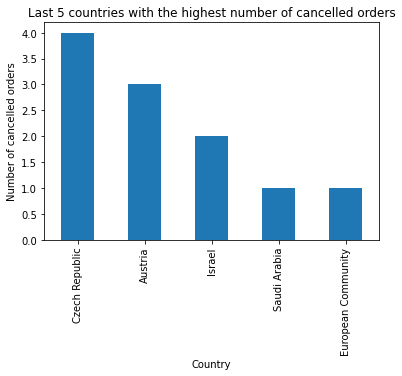

In [ ]:
cancelled_orders_count[-5:].plot(kind='bar')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of cancelled orders')
plt.title('Last 5 countries with the highest number of cancelled orders')

# Show the plot
plt.show()

Since being a top selling country, the UK holds the highest number of order cancellations, followed by Germany, EIRE and France accordingly. The country with the lowest number of order cancellations is Saudi Arabia with only 1 cancellation.

<ipython-input-28-916e93b06048>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 1080x432 with 0 Axes>

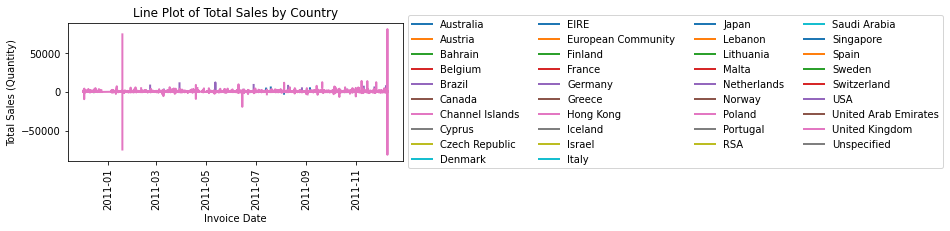

In [ ]:
#  The total sales by country over time
plt.figure(figsize=(15, 6))
pivoted.plot(linewidth=2)
plt.title("Line Plot of Total Sales by Country")
plt.xlabel("Invoice Date")
plt.ylabel("Total Sales (Quantity)")

# Divide the country labels into 4 columns
plt.xticks(rotation=90, ha="center")
plt.tight_layout()
plt.subplots_adjust(bottom=0.4)

# Show the country labels under the graph
ax = plt.gca()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=4)
plt.show()


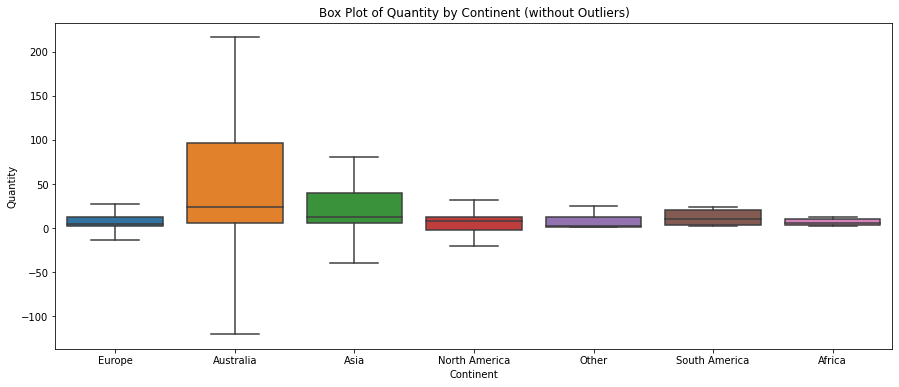

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Continent', y='Quantity', data=df, showfliers=False)
plt.title("Box Plot of Quantity by Continent (without Outliers)")
plt.xlabel("Continent")
plt.ylabel("Quantity")
plt.show()



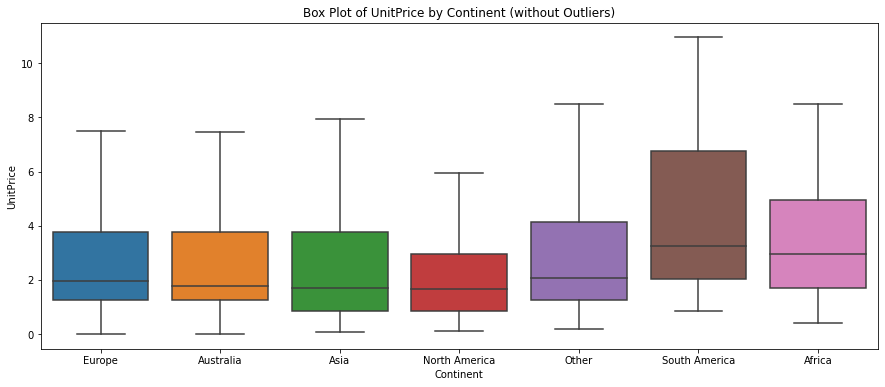

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Continent', y='UnitPrice', data=df, showfliers=False)
plt.title("Box Plot of UnitPrice by Continent (without Outliers)")
plt.xlabel("Continent")
plt.ylabel("UnitPrice")
plt.show()

The above two graphs show the distribution of sales and unit price across the continents. According to the graphs, the highest mean unit price and the highest values can be seen in the South American region. On the other hand, Australia holds both these values in terms of quantity count.

In [ ]:
#What is the Sum Income,  Total Quantity,  Total Sales value for each country?

def average_transaction_value_per_country(df):
    df['Income'] = df['Quantity'] * df['UnitPrice']
    avg_income_per_country = df.groupby('Country').agg({'Income': 'sum','Quantity': 'sum', 'InvoiceNo': 'count'})
    avg_income_per_country.columns = ['Sum Income', 'Total Quantity', 'Total Sales']
    avg_income_per_country = avg_income_per_country.sort_values(by='Sum Income', ascending=False)
    return avg_income_per_country

result = average_transaction_value_per_country(df)
result = result.sort_values(by='Sum Income', ascending=False)
print(result)


                       Sum Income  Total Quantity  Total Sales
Country                                                       
United Kingdom        8209930.484         4263827       495476
Netherlands            284661.540          200128         2371
EIRE                   263276.820          142637         8196
Germany                221698.210          117448         9495
France                 197403.900          110480         8557
Australia              137077.270           83653         1259
Switzerland             56385.350           30325         2002
Spain                   54774.580           26824         2533
Belgium                 40910.960           23152         2069
Sweden                  36595.910           35637          462
Japan                   35340.620           25218          358
Norway                  35163.460           19247         1086
Portugal                29367.020           16180         1519
Finland                 22326.740           10666      

<ipython-input-32-3e55ed6b425a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'] = df['Quantity'] * df['UnitPrice']


* The above table displays the highest income, sales, and quantity according to the countries. The UK holds the first place for it.

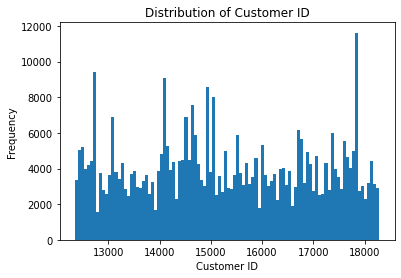

Number of unique customers by country:
Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Lithuania                  1
Czech Republic             1
Lebanon                    1
RSA                        1
Saudi Arabia             

In [ ]:
'''
below function is to get CustomerID distribution and find unique
coutromer by ceach country.

'''
def customer_id_distribution(df):
    # Plot the distribution of the Customer ID variable
    plt.hist(df['CustomerID'].dropna(), bins=100)
    plt.xlabel("Customer ID")
    plt.ylabel("Frequency")
    plt.title("Distribution of Customer ID")
    plt.show()

    # Find the number of unique customers by country
    unique_customers_per_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
    return unique_customers_per_country



unique_customers = customer_id_distribution(df)
print("Number of unique customers by country:")
print(unique_customers)


In [ ]:
def avg_trans_value(df):
    # Group the data frame by Customer ID
    grouped = df.groupby('CustomerID')

    # Calculate the average transaction value for each customer
    avg_trans = grouped['Income'].sum().sort_values(ascending=False)

    return avg_trans

# Call the function and pass in the data frame
avg_trans = avg_trans_value(df)
print(avg_trans)

CustomerID
14646    278778.02
18102    259657.30
17450    189735.53
14911    128650.08
12415    123638.18
           ...    
12666      -227.44
16252      -295.09
16742      -464.90
15823      -811.86
14213     -1192.20
Name: Income, Length: 4363, dtype: float64


*This shows the average spending by customers, where customer 14646 holds the highest value and customer 14213 has the lowest.

CustomerID
17448.0     -4287.63
15369.0     -1592.49
14213.0     -1192.20
17603.0     -1165.30
12503.0     -1126.00
             ...    
12415.0    123725.45
14911.0    132572.62
17450.0    187482.17
18102.0    256438.49
14646.0    279489.02
Name: Income, Length: 4372, dtype: float64


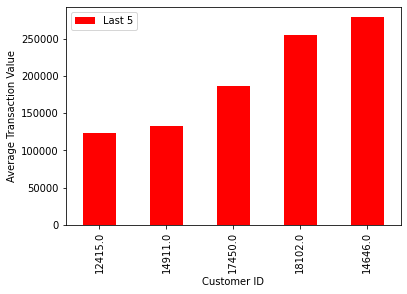

In [ ]:

def avg_trans_value_top_and_last_5(df):
    # Group the data frame by Customer ID
    grouped = df.groupby('CustomerID')

    # Calculate the average transaction value for each customer
    avg_trans = grouped['Income'].sum()

    # Sort the average transaction values in ascending order
    avg_trans_sorted = avg_trans.sort_values()
    print(avg_trans_sorted)

    # Get the top 5 and last 5 average transaction values
    # top_5 = avg_trans_sorted.iloc[:5]
    last_5 = avg_trans_sorted.iloc[-5:]

    # Plot the top 5 and last 5 average transaction values in a bar graph
    fig, ax = plt.subplots()
    # top_5.plot(kind='bar', color='blue', ax=ax, label='Top 5')
    last_5.plot(kind='bar', color='red', ax=ax, label='Last 5')
    ax.legend()
    ax.set_xlabel('Customer ID')
    ax.set_ylabel('Average Transaction Value')
    plt.show()

# Call the function and pass in the data frame
avg_trans_value_top_and_last_5(df)


CustomerID
15195.0    3861.000000
13135.0    3096.000000
17846.0    2033.100000
16532.0    1687.200000
15749.0    1435.726667
14213.0    -238.440000
13154.0    -611.860000
12503.0   -1126.000000
15369.0   -1592.490000
17448.0   -4287.630000
Name: Income, dtype: float64


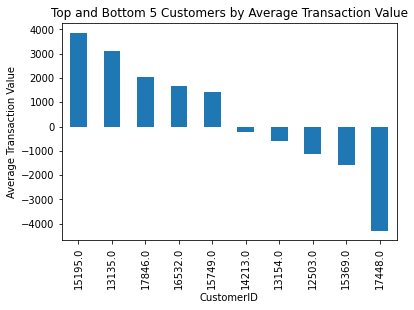

In [ ]:

# Calculate the average transaction value for each customer
avg_txn_val = df.groupby("CustomerID").mean()["Income"]
# avg_txn_val = df.groupby("CustomerID").sum()["Income"]
# Sort the customers based on average transaction value
sorted_customers = avg_txn_val.sort_values(ascending=False)

# Select the top 5 and bottom 5 customers
top_5 = sorted_customers.iloc[:5]
bottom_5 = sorted_customers.iloc[-5:]

# Concatenate the top 5 and bottom 5 customers into a single data frame
top_and_bottom_5 = pd.concat([top_5, bottom_5])
print(top_and_bottom_5)
# Plot the average transaction value for each customer
top_and_bottom_5.plot(kind="bar")
plt.xlabel("CustomerID")
plt.ylabel("Average Transaction Value")
plt.title("Top and Bottom 5 Customers by Average Transaction Value")
plt.show()


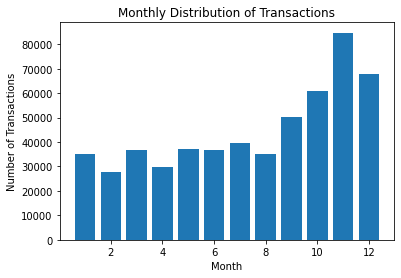

In [ ]:
#What is the monthly distribution of transactions?
# Group the data by month and count the number of transactions
monthly_transactions = df.groupby('Month').size()

# Plot the bar graph
plt.bar(monthly_transactions.index, monthly_transactions.values)
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title("Monthly Distribution of Transactions")
plt.show()



* Most of the products have been sold at the end of the year. The reasons behind this may be because the main product selling region is Europe, and it is festival time at the end of the year.

In [ ]:
#What is the most frequent Stock Code and its Description?

def frequent_stock_code(df):
    # Grouping the dataframe by Stock Code
    group = df.groupby('StockCode').size().reset_index(name='counts')
    # Sorting the values based on counts in descending order
    group = group.sort_values(by='counts', ascending=False)
    # Selecting the top 5 Stock Codes
    top_5 = group.head(5)
    # Merging the top 5 Stock Codes with original dataframe to get the Description
    result = pd.merge(top_5, df, on='StockCode')
    # Removing duplicate rows based on Stock Code
    result = result.drop_duplicates(subset='StockCode')
    # Selecting only Stock Code and Description columns
    result = result[['StockCode', 'Description']]
    return result

result = frequent_stock_code(df)
print(result)



     StockCode                         Description
0       85123A  WHITE HANGING HEART T-LIGHT HOLDER
2313     22423            REGENCY CAKESTAND 3 TIER
4516    85099B             JUMBO BAG RED RETROSPOT
6675     47566                       PARTY BUNTING
8402     20725             LUNCH BAG RED RETROSPOT


* WHITE HANGING HEART T-LIGHT HOLDER is most famous product

         StockCode      Income
4059           DOT  206245.480
1271         22423  164762.190
2517         47566   98302.980
3670        85123A   97894.500
3659        85099B   92356.030
4042             D   -5696.220
4039  BANK CHARGES   -7175.639
4041          CRUK   -7933.430
4060             M  -68674.190
4037     AMAZONFEE -221520.500


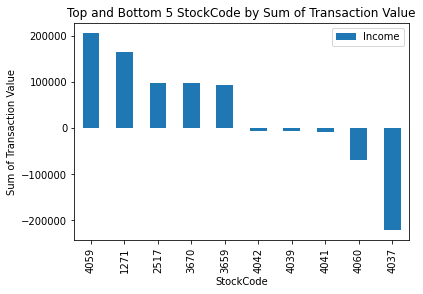

In [ ]:
#What is the sum transaction value for each Stock Code?
# Calculate the sum transaction value for each Stock Code
df_sum_transaction_value = df.groupby('StockCode').agg({'Income': 'sum'})

# Reset the index
df_sum_transaction_value = df_sum_transaction_value.reset_index()
df_sum_transaction_value = df_sum_transaction_value.sort_values(by='Income', ascending=False)
# Print the result
# print(df_sum_transaction_value.head())
# print("Least Incomed Stockecodes")
# print(df_sum_transaction_value.tail())
# Select the top 5 and bottom 5 customers
top_5 =df_sum_transaction_value.iloc[:5]
bottom_5 = df_sum_transaction_value.iloc[-5:]

# Concatenate the top 5 and bottom 5 StockCode into a single data frame
top_and_bottom_5 = pd.concat([top_5, bottom_5])
print(top_and_bottom_5)
# Plot the Sum of  transaction value for each StockCode
top_and_bottom_5.plot(kind="bar")
plt.xlabel("StockCode")
plt.ylabel("Sum of Transaction Value")
plt.title("Top and Bottom 5 StockCode by Sum of Transaction Value")
plt.show()


This visualization displays the stock codes with the highest and lowest income. The codes 4059 and 4037 hold these values, respectively.

     StockCode  Quantity
1070     22197     56450
2622     84077     53847
3659    85099B     47363
3670    85123A     38830
2735     84879     36221
3283   79323LP     -2618
3286    79323W     -4838
3213    72140F     -5368
1828     23003     -8516
1830     23005    -14418


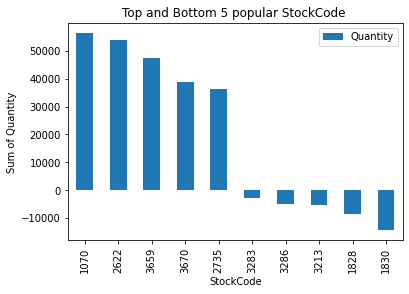

In [ ]:
#What is the most 5 popular and unpopular Stock Code?
# Calculate the sum transaction value for each Stock Code
df_sum_transaction_value = df.groupby('StockCode').agg({'Quantity': 'sum'})

# Reset the index
df_sum_transaction_value = df_sum_transaction_value.reset_index()
df_sum_transaction_value = df_sum_transaction_value.sort_values(by='Quantity', ascending=False)

top_5 =df_sum_transaction_value.iloc[:5]
bottom_5 = df_sum_transaction_value.iloc[-5:]

# Concatenate the top 5 and bottom 5 StockCode into a single data frame
top_and_bottom_5 = pd.concat([top_5, bottom_5])
print(top_and_bottom_5)
# Plot StockCode
top_and_bottom_5.plot(kind="bar")
plt.xlabel("StockCode")
plt.ylabel("Sum of Quantity")
plt.title("Top and Bottom 5 popular StockCode ")
plt.show()

This visualization displays the stock codes with the highest and lowest popular. The codes 1070 and 1830 hold these values, respectively.

In [ ]:
def popular_products(df):
    # Group by Description, Country, and sum the Quantity and Income for each product
    product_group = df.groupby(['Description', 'Country']).agg({'Quantity': 'sum', 'Income': 'sum'})

    # Sort by Quantity in descending order
    product_group = product_group.sort_values('Quantity', ascending=False)

    # Get the top 5 most sold products
    top_5_products = product_group.head(5)

    return top_5_products


In [ ]:
popular_products(df)

,,Quantity,Income
Description,Country,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,United Kingdom,48326,12055.96
JUMBO BAG RED RETROSPOT,United Kingdom,43167,84516.44
POPCORN HOLDER,United Kingdom,34365,32425.81
ASSORTED COLOUR BIRD ORNAMENT,United Kingdom,33679,54662.15
WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,33193,93953.07


In [ ]:
unique_countries = df["Country"].unique()
print(unique_countries)


['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


                   Income
Continent                
Africa            1002.31
Asia             55772.66
Australia       136972.15
Europe         8069710.85
North America     4846.36
Other             2667.07
South America     1125.75


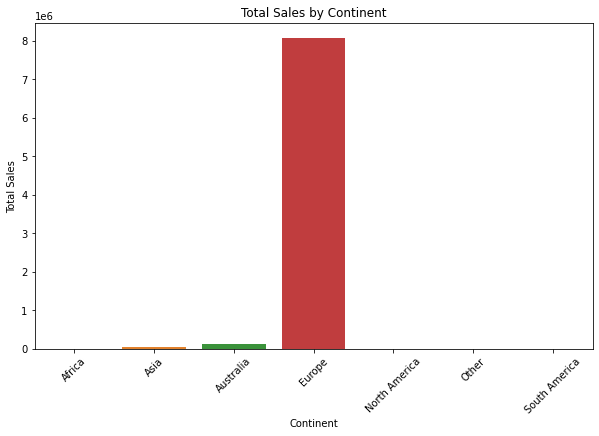

In [ ]:
# Group the data by continent and sum the Income for each continent
continent_group = df.groupby('Continent').agg({'Income': 'sum'})
print(continent_group)
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_group.index, y='Income', data=continent_group)
plt.title('Total Sales by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


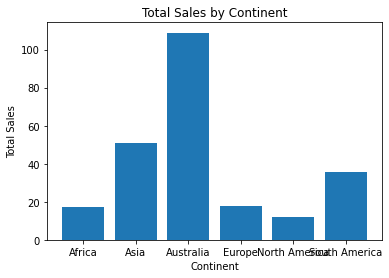

In [ ]:
# Group the data by continent and sum the Income for each continent
continent_group = df.groupby('Continent').agg({'Income': 'mean'})

# Plot the bar chart
plt.bar(continent_group.index, continent_group['Income'])

# Add labels and title to the chart
plt.xlabel('Continent')
plt.ylabel('Total Sales')
plt.title('Total Sales by Continent')

# Show the chart
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objs as go

# Group the data by continent and sum the Income for each continent
continent_group = df.groupby('Continent').agg({'Income': 'sum'})

# Create a donut chart using Plotly Express
fig = px.pie(continent_group,
             values='Income',
             names=continent_group.index,
             title='Mean Sales by Continent')

# Update the layout to remove the hole in the center of the chart
# fig.update_layout(
#     updatemenus=[
#         dict(
#             type="buttons",
#             showactive=False,
#             buttons=[
#                 dict(
#                     label="Pie Chart",
#                     method="update",
#                     args=[{"visible": [True, True, True, True]},
#                           {"title": "Total Sales by Continent",
#                            "annotations": []}]
#                 )
#                 ,
#                 # dict(
#                 #     label="Donut Chart",
#                 #     method="update",
#                 #     args=[{"visible": [True, True, True, True]},
#                 #           {"title": "Total Sales by Continent",
#                 #            "annotations": [{"text": "Total Sales",
#                 #                             "font": {"size": 20},
#                 #                             "showarrow": False,
#                 #                             "textangle": -90}]}]
#                 # )
#             ]
#         )
#     ]
# )

# Show the chart
fig.show()


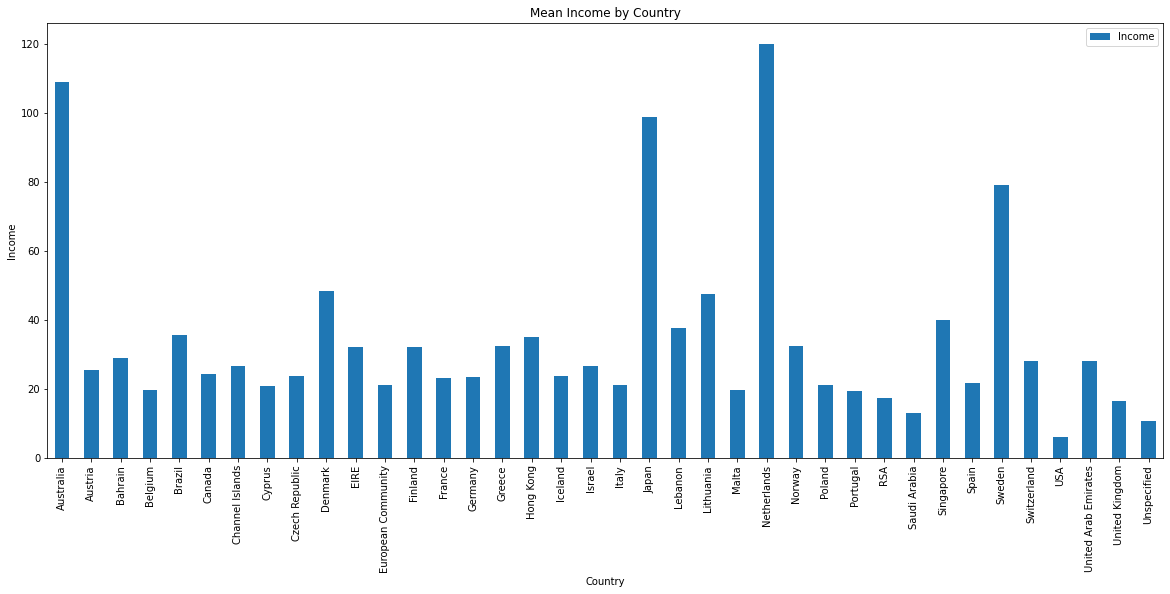

In [ ]:
#Total income for each country using a bar chart:
# Group the data by country and sum the Income for each country
country_group = df.groupby('Country').agg({'Income': 'mean'})

# Plot the bar chart
fig, ax = plt.subplots(figsize=(20, 8))
country_group.plot(kind='bar', ax=ax)

# Add labels and title to the chart
ax.set_xlabel('Country')
ax.set_ylabel('Income')
ax.set_title('Mean Income by Country')

# country_group['Income'].plot(kind='bar', title='Total Income by Country')

# Show the chart
plt.show()

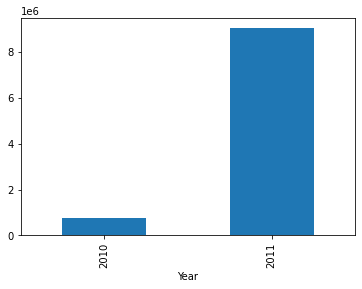

In [ ]:
# Total sales for different years
df.groupby('Year')['Income'].sum().plot(kind = 'bar')

According to data set data has only twoyear 2010 and 2012 , data are collected by 2010 dec to 2011 dec

In [ ]:
def monthly_sales(df):
    # Group the data by Month and sum the Income for each month
    month_group = df.groupby(['Year','Month']).agg({'Income': 'sum'})

    return month_group


In [ ]:
monthly_sales(df)

Income
Year Month             
2010 12      748957.020
2011 1       560000.260
     2       498062.650
     3       683267.080
     4       493207.121
     5       723333.510
     6       691123.120
     7       681300.111
     8       704804.630
     9      1019687.622
     10     1070704.670
     11     1461756.250
     12      433668.010

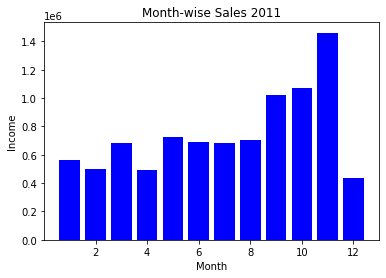

In [ ]:
# Filter the data for the year 2011
df_2011 = df[df['Year'] == 2011]
# Group the data by month and sum the Income for each month
month_group = df_2011.groupby('Month').agg({'Income': 'sum'})

# Plot the bar graph
plt.bar(month_group.index, month_group['Income'], color='blue')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Income')
plt.title('Month-wise Sales 2011')

# Show the graph
plt.show()


In [ ]:
# Sum of returns by Country

def create_returns_matrix(df):
    # Filter the data to only include returns (Quantity < 0)
    returns_df = df[df['Quantity'] < 0]
    # Group the data by country and year, and sum the returns for each combination
    returns_group = returns_df.groupby(['Continent', 'Year']).agg({'Quantity': 'sum'})

    # Pivot the data to create the matrix table
    returns_matrix = returns_group.pivot_table(index='Continent', columns='Year', values='Quantity')

    return returns_matrix


In [ ]:
create_returns_matrix(df)

Year,2010,2011
Continent,,
Asia,-56.0,-868.0
Australia,-13.0,-543.0
Europe,-20019.0,-461608.0
North America,NaN,-1424.0


In [ ]:
# returns by continent and year
# Prepare the data
df['Return'] = df['Quantity'] < 0
df['Return'] = df['Return'].astype(int)
return_data = df[df['Return'] == 1].groupby(['Continent', 'Year']).agg({'Return': 'sum'})
return_data = return_data.reset_index()

# Create the stacked bar chart
fig = px.bar(return_data, x='Year', y='Return', color='Continent', barmode='stack')
fig.update_layout(title='Returns by Continent and Year', xaxis_title='Year', yaxis_title='Returns')

# Show the chart
fig.show()


<ipython-input-72-a7c1160d9ed8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return'] = df['Quantity'] < 0
<ipython-input-72-a7c1160d9ed8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return'] = df['Return'].astype(int)


product returns by continent each year, Highest product return indicate in 2011 in europ.

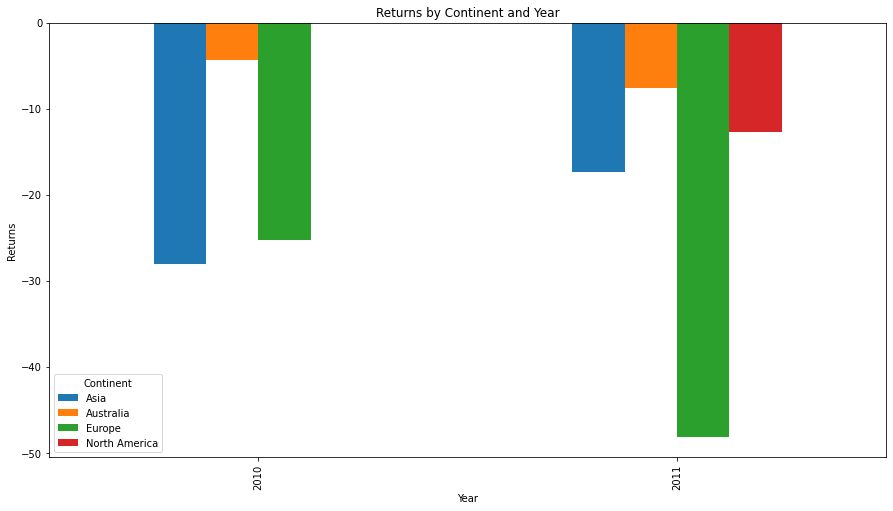

In [ ]:
# Filter the data to only include returns (where Quantity is less than 0)
returns = df[df['Quantity'] < 0]

# Create a pivot table with the index being the year and month of the InvoiceDate,
# the columns being the continent, and the values being the sum of the returns
pivot_table = returns.pivot_table(index=returns['InvoiceDate'].dt.to_period("Y"),
                                   columns='Continent',
                                   values='Quantity',
                                   aggfunc='mean')

# Plot the pivot table as a bar chart
pivot_table.plot(kind='bar', figsize=(15,8))

# Add a title and labels
plt.title("Returns by Continent and Year")
plt.xlabel("Year")
plt.ylabel("Returns")

# Show the plot
plt.show()


In [ ]:
products = df['Description'].unique().tolist()

In [ ]:
print(products)
len(products)

['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT', 'ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND', 'JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION', 'BATH BUILDING BLOCK WORD', 'ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE GREEN', 'PANDA AND BUNNIES STICKER SHEET', 'STARS GIFT TAPE ', 'INFLATABLE POLITICAL GLOBE ', 'VINTAGE 

4224

##Modling Part

* Develop Recommendation model Using Tensorflow

The code is for creating a deep learning-based hybrid recommendation system using TensorFlow in Python. It starts by pre-processing the input data, including mapping customer IDs and stock codes to unique integer values, and splitting the data into training and testing sets. The customer and product models are then created, each consisting of input, embedding, flatten, and dense layers. The customer-based model maps customer IDs to a lower-dimensional representation and the product-based model maps stock codes to a lower-dimensional representation. The final hybrid model is created by merging the customer and product models and adding two dense layers as the output. The model is then compiled and trained using Adam optimization and mean squared error loss function.

In [ ]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366463 sha256=abd1c3f95495640acb55969abb35fad3f2a85e7324bb64498172c58b06aa6d5c
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Input, Flatten, Dot, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
#Load Data

#data Url
url = "/content/drive/MyDrive/FireHouseTest/Online Retail.xlsx"
dfm = pd.read_excel(url)


In [ ]:
print (dfm.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
df=dfm.copy()

In [ ]:
#handling StockCodes
df['StockCode1'] = df['StockCode']

In [ ]:
df['StockCode'] = df['StockCode'].apply(lambda x: x[:-1] if type(x) == str and len(x) == 6 and not x.isdigit() else x)
df['StockCode'].unique()

array(['85123', 71053, '84406', ..., 23609, 23617, 23843], dtype=object)

In [ ]:
df['StockCode'] = df['StockCode'].apply(lambda x: int(x) if str(x).isdigit() else x)

In [ ]:
df = df[df['StockCode'].astype(str).str.isdigit()]
df['StockCode'] = df['StockCode'].astype(int)

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
StockCode1     0
dtype: int64

In [ ]:
# Preprocess the data
df = df.dropna()
df['CustomerID'] = df['CustomerID'].astype(int)
df['StockCode'] = df['StockCode'].astype(int)
df['Quantity'] = df['Quantity'].astype(int)
df['UnitPrice'] = df['UnitPrice'].astype(float)

In [ ]:
# Create a list of unique customer IDs and stock codes
customer_ids = df['CustomerID'].unique().tolist()
stock_codes = df['StockCode'].unique().tolist()

In [ ]:
# Create a dictionary mapping customer IDs and stock codes to integers
customer_id_map = {id: i for i, id in enumerate(customer_ids)}
stock_code_map = {code: i for i, code in enumerate(stock_codes)}

In [ ]:
# Replace the customer IDs and stock codes in the data with the integers
df['CustomerID'] = df['CustomerID'].map(lambda x: customer_id_map[x])
df['StockCode'] = df['StockCode'].map(lambda x: stock_code_map[x])

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2)

In [ ]:
# Create the input and output data for the model
train_input = train_data[['CustomerID', 'StockCode']]
train_output = train_data[['Quantity']]
test_input = test_data[['CustomerID', 'StockCode']]
test_output = test_data[['Quantity']]

In [ ]:
# Create the customer-based model
# customer_input = tf.keras.layers.Input(shape=(1,))
# customer_embedding = tf.keras.layers.Embedding(len(customer_ids), 8)(customer_input)
# customer_flatten = tf.keras.layers.Flatten()(customer_embedding)
# customer_output = tf.keras.layers.Dense(64, activation='relu')(customer_flatten)

customer_input = tf.keras.layers.Input(shape=(1,))
customer_embedding = tf.keras.layers.Embedding(len(customer_ids), 64)(customer_input)
customer_flatten = tf.keras.layers.Flatten()(customer_embedding)
customer_output = tf.keras.layers.Dense(64, activation='relu')(customer_flatten)


In [ ]:
# Create the product-based model
product_input = tf.keras.layers.Input(shape=(1,))
product_embedding = tf.keras.layers.Embedding(len(stock_codes), 8)(product_input)
product_flatten = tf.keras.layers.Flatten()(product_embedding)
product_output = tf.keras.layers.Dense(64, activation='relu')(product_flatten)

In [ ]:
# Merge the customer and product models
merged = tf.keras.layers.concatenate([customer_output, product_output])
output = tf.keras.layers.Dense(32, activation='relu')(merged)
output = tf.keras.layers.Dense(1)(output)

In [ ]:
# Create the hybrid model
model = tf.keras.models.Model(inputs=[customer_input, product_input], outputs=output)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit([train_input['CustomerID'], train_input['StockCode']], train_output, epochs=1, batch_size=32)

10116/10116 [==============================] - 97s 9ms/step - loss: 22378.8906


In [ ]:
score = model.evaluate([test_input['CustomerID'], test_input['StockCode']], test_output)
print("Score:", score)

2529/2529 [==============================] - 6s 2ms/step - loss: 218999.9375
Score: 218999.9375


In [ ]:
history = model.fit([train_input['CustomerID'], train_input['StockCode']], train_output, epochs=30, batch_size=32)

# Plot the training loss
plt.plot(history.history['loss'])

# Label the x-axis and y-axis
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Show the plot
plt.show()


Epoch 1/30
10116/10116 [==============================] - 67s 7ms/step - loss: 39298.6133
Epoch 2/30
10116/10116 [==============================] - 78s 8ms/step - loss: 39118.5078
Epoch 3/30
10116/10116 [==============================] - 84s 8ms/step - loss: 38970.4922
Epoch 4/30
10116/10116 [==============================] - 70s 7ms/step - loss: 38797.0273
Epoch 5/30
10116/10116 [==============================] - 92s 9ms/step - loss: 38612.4727
Epoch 6/30
10116/10116 [==============================] - 72s 7ms/step - loss: 38374.2773
Epoch 7/30
10116/10116 [==============================] - 68s 7ms/step - loss: 37993.0547
Epoch 8/30
10116/10116 [==============================] - 65s 6ms/step - loss: 37717.8516
Epoch 9/30
10116/10116 [==============================] - 68s 7ms/step - loss: 37806.3633
Epoch 10/30
10116/10116 [==============================] - 69s 7ms/step - loss: 37264.7539
Epoch 11/30
10116/10116 [==============================] - 67s 7ms/step - loss: 37007.8281
Epoch 12

NameError: ignored

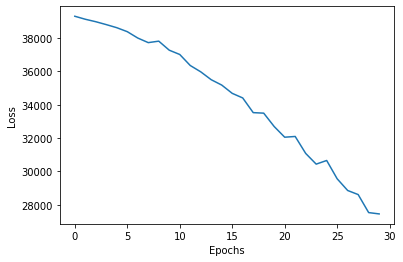

In [ ]:
# Plot the training loss
plt.plot(history.history['loss'])

# Label the x-axis and y-axis
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Show the plot
plt.show()


In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)


0 input_16
1 input_17
2 embedding_15
3 embedding_16
4 flatten_15
5 flatten_16
6 dense_30
7 dense_31
8 concatenate_7
9 dense_32
10 dense_33


In [ ]:
#give recomdations

def recommend(model, customer_id_map, stock_code_map, customer_id=None, stock_code=None):
    if customer_id is not None:
        # Get the embeddings for the customer
        customer_embeddings = model.get_layer("embedding_15").get_weights()[0][customer_id_map[customer_id]]

        # Use the embeddings to make recommendations
        stock_code_scores = customer_embeddings @ model.get_layer("dense_30").get_weights()[0].T
        top_stock_codes = np.argsort(-stock_code_scores)[:5]
        top_stock_codes = [list(stock_code_map.keys())[list(stock_code_map.values()).index(code)] for code in top_stock_codes]
        return top_stock_codes
    elif stock_code is not None:
        # Get the embeddings for the product
        product_embeddings = model.get_layer("embedding_5").get_weights()[0][stock_code_map[stock_code]]

        # Use the embeddings to make recommendations
        customer_id_scores = product_embeddings @ model.get_layer("dense_9").get_weights()[0].T
        top_customer_ids = np.argsort(-customer_id_scores)[:5]
        top_customer_ids = [list(customer_id_map.keys())[list(customer_id_map.values()).index(id)] for id in top_customer_ids]
        return top_customer_ids
    else:
        raise ValueError("Either customer_id or stock_code must be provided.")


In [ ]:
rmd=recommend(model, customer_id_map, stock_code_map, customer_id=17850, stock_code=None)
print("peredicted product code for particular customer: " ,rmd)

peredicted product code for particular customer:  [22629, 20725, 21258, 21035, 21871]


In [ ]:
def get_stock_details(rmd, df):
    stock_details = {}
    for code in rmd:
        print(code)
        stock = df[df['StockCode'] == code]
        if stock.empty:
            continue
        stock_details[code] = (stock['Description'].values[0], stock['StockCode1'].values[0])
    return stock_details


In [ ]:
prediction = model.predict([test_input['CustomerID'], test_input['StockCode']])


2529/2529 [==============================] - 17s 7ms/step


In [ ]:
print(prediction)

[[ 3.5004225]
 [63.967224 ]
 [58.682587 ]
 ...
 [ 4.763351 ]
 [ 9.864673 ]
 [15.266948 ]]


In [ ]:
# Evaluate the predictions
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(prediction, test_output)
print(f'Mean Squared Error: {mean_squared_error}')

Mean Squared Error: 219000.05072715538


* Large loss values in a machine learning model indicate that the model is performing poorly and making inaccurate predictions. Loss is a measure of the difference between the predicted output of a model and the actual target output. The goal of training a model is to minimize the loss, so that the model can make accurate predictions.

* it means that the model's predictions are far off from the actual target values, and that the model has not learned the relationships between the inputs and outputs effectively. This can be due to a variety of factors, such as overfitting, underfitting, poor model architecture, or a lack of training data

In [ ]:
#lets try above model using Description feild instead of StockCode.

In [ ]:

# Clean the data
df = df.dropna()
df['CustomerID'] = df['CustomerID'].astype(int)
df['StockCode'] = df['StockCode'].astype(int)
df['Quantity'] = df['Quantity'].astype(int)
df['UnitPrice'] = df['UnitPrice'].astype(float)

# Create a list of unique customer IDs and product names
customer_ids = df['CustomerID'].unique().tolist()
product_names = df['Description'].unique().tolist()

# Create a dictionary mapping customer IDs and product names to integers
customer_id_map = {id: i for i, id in enumerate(customer_ids)}
product_name_map = {name: i for i, name in enumerate(product_names)}

# Replace the customer IDs and product names in the data with the integers
df['CustomerID'] = df['CustomerID'].map(lambda x: customer_id_map[x])
df['Description'] = df['Description'].map(lambda x: product_name_map[x])

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2)

# Create the input and output data for the model
train_input = train_data[['CustomerID', 'Description']]
train_output = train_data[['Quantity']]
test_input = test_data[['CustomerID', 'Description']]
test_output = test_data[['Quantity']]

# Create the customer-based model
customer_input = tf.keras.layers.Input(shape=(1,))
customer_embedding = tf.keras.layers.Embedding(len(customer_ids), 8)(customer_input)
customer_flatten = tf.keras.layers.Flatten()(customer_embedding)
customer_output = tf.keras.layers.Dense(64, activation='relu')(customer_flatten)

# Create the product-based model
product_input = tf.keras.layers.Input(shape=(1,))
product_embedding = tf.keras.layers.Embedding(len(product_names), 8)(product_input)
product_flatten = tf.keras.layers.Flatten()(product_embedding)
product_output = tf.keras.layers.Dense(64, activation='relu')(product_flatten)

# Merge the customer and product models
merged = tf.keras.layers.concatenate([customer_output, product_output])
output = tf.keras.layers.Dense(32, activation='relu')(merged)
output = tf.keras.layers.Dense(1)(output)

# Create the hybrid model
model = tf.keras.models.Model(inputs=[customer_input, product_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit([train_input['CustomerID'], train_input['Description']], train_output, epochs=10, batch_size=64)

Epoch 1/10
5058/5058 [==============================] - 15s 3ms/step - loss: 76721.8203
Epoch 2/10
5058/5058 [==============================] - 14s 3ms/step - loss: 76516.9766
Epoch 3/10
5058/5058 [==============================] - 14s 3ms/step - loss: 76424.3906
Epoch 4/10
5058/5058 [==============================] - 16s 3ms/step - loss: 76358.9922
Epoch 5/10
5058/5058 [==============================] - 21s 4ms/step - loss: 76327.4766
Epoch 6/10
5058/5058 [==============================] - 20s 4ms/step - loss: 76282.7500
Epoch 7/10
5058/5058 [==============================] - 17s 3ms/step - loss: 76247.7344
Epoch 8/10
5058/5058 [==============================] - 14s 3ms/step - loss: 76230.2578
Epoch 9/10
5058/5058 [==============================] - 14s 3ms/step - loss: 76200.4219
Epoch 10/10
5058/5058 [==============================] - 14s 3ms/step - loss: 76167.8750


In [ ]:
test_loss = model.evaluate([test_input['CustomerID'], test_input['Description']], test_output)
print(f'Test loss: {test_loss}')

2529/2529 [==============================] - 6s 2ms/step - loss: 1590.1488
Test loss: 1590.1488037109375


In [ ]:
# Make predictions
predictions = model.predict([test_input['CustomerID'], test_input['Description']])

2529/2529 [==============================] - 5s 2ms/step


In [ ]:
print(predictions )

[[18.892563  ]
 [ 7.1400714 ]
 [ 5.175719  ]
 ...
 [ 0.43825108]
 [10.963661  ]
 [10.921533  ]]


In [ ]:
# Evaluate the predictions
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(predictions, test_output)
print(f'Mean Squared Error: {mean_squared_error}')

Mean Squared Error: 1590.1475054746518


* it also gives larger error, though is less than above model,model need to be fine tune

* lets try early Stopping method

In [ ]:

class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def __init__(self, patience=10):
        super().__init__()
        self.patience = patience
        self.best_val_loss = float('inf')
        self.early_stopping_counter = 0

    def on_epoch_end(self, epoch, logs):
        current_val_loss = logs.get('val_loss')
        if current_val_loss < self.best_val_loss:
            self.best_val_loss = current_val_loss
            self.early_stopping_counter = 0
        else:
            self.early_stopping_counter += 1
        if self.early_stopping_counter >= self.patience:
            self.model.stop_training = True

model = tf.keras.models.Model(inputs=[customer_input, product_input], outputs=output)

model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStoppingCallback(patience=10)
model.fit([train_input['CustomerID'], train_input['StockCode']], callbacks=[early_stopping])




# NearestNeighbors Algorithm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
data=dfm.copy()

In [ ]:
# Filter out the rows with missing CustomerID values
data = data[pd.notnull(data['CustomerID'])]
data['CustomerID']=data['CustomerID'].astype(int)
# Filter out the rows with negative UnitPrice values
data = data[data['UnitPrice'] > 0]

# Filter out the rows with missing Description values
data = data[pd.notnull(data['Description'])]

# Filter out the rows with cancelled transactions (InvoiceNo starts with 'C')
data = data[~data['InvoiceNo'].astype(str).str.startswith("C")]

#split Data


# Create a pivot table to get the customer-item matrix
customer_item_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)
# print(customer_item_matrix)
print(customer_item_matrix.index.dtype)

# Convert the customer-item matrix to a sparse matrix
sparse_matrix = csr_matrix(customer_item_matrix.values)

# Fit the nearest neighbors model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(sparse_matrix)


print(customer_item_matrix.index.dtype)

<ipython-input-227-bfcabbfc9c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustomerID']=data['CustomerID'].astype(int)


int64
int64


In [ ]:
18283 in customer_item_matrix.index

True

In [ ]:
type(18283)

int

In [ ]:
def recommend(customer_id, sparse_matrix, model_knn, customer_item_matrix, n_rec=10):
  distances, indices = model_knn.kneighbors(sparse_matrix[customer_item_matrix.index == customer_id], n_neighbors=n_rec+1)
  rec_items = []
  for i in range(1, len(indices.flatten())):

    item = customer_item_matrix.index[indices.flatten()[i]]
    rec_items.append(item)
  return rec_items

In [ ]:
print(recommend(18283, sparse_matrix, model_knn, customer_item_matrix, n_rec=10))

[14367, 17160, 16347, 14849, 12700, 15450, 17511, 15920, 12757, 16757]


# Singular Value Decomposition  Model

In [ ]:
# Import the library
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

In [ ]:
dff=df.copy()

In [ ]:
# Preprocess the data
dff = dff.dropna()
dff['CustomerID'] = dff['CustomerID'].astype(int)
dff['StockCode'] = dff['StockCode'].astype(int)
dff['Quantity'] = dff['Quantity'].astype(int)


In [ ]:
# Create a reader object to specify the scale of the data
reader = Reader(rating_scale=(0, df['Quantity'].max()))

# Load the data into a Surprise dataset object
dataset = Dataset.load_from_df(df[['CustomerID', 'StockCode', 'Quantity']], reader)

In [ ]:
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)


In [ ]:
print(data)

In [ ]:
# Train the SVD model
algo = SVD()
algo.fit(trainset)

# Make predictions on the testing set
predictions = algo.test(testset)

# Evaluate the model
from surprise.accuracy import rmse
rmse(predictions)

RMSE: 80982.8717


80982.87169908073

In [ ]:
Df_final=df

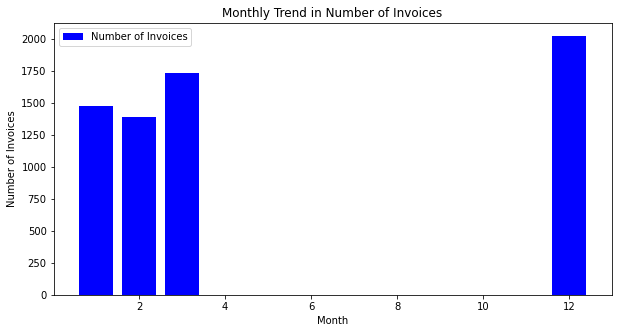

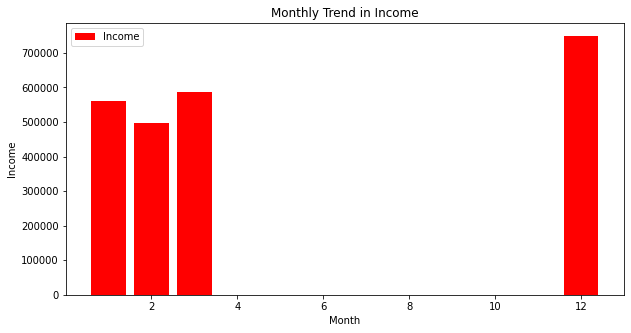

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the InvoiceDate_Date column to a datetime object
df['InvoiceDate_Date'] = pd.to_datetime(df['InvoiceDate_Date'])

# Create a new column in the DataFrame with the month of the invoice
df['InvoiceMonth'] = df['InvoiceDate_Date'].dt.month

# Group the data by the InvoiceMonth and calculate the total number of invoices and income
monthly_data = df.groupby(['InvoiceMonth']).agg({'InvoiceNo':'nunique', 'Income':'sum'})

# Plot the monthly trend in the number of invoices
plt.figure(figsize=(10, 5))
plt.bar(monthly_data.index, monthly_data['InvoiceNo'], color='blue', label='Number of Invoices')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.title('Monthly Trend in Number of Invoices')
plt.legend()
plt.show()

# Plot the monthly trend in the income
plt.figure(figsize=(10, 5))
plt.bar(monthly_data.index, monthly_data['Income'], color='red', label='Income')
plt.xlabel('Month')
plt.ylabel('Income')
plt.title('Monthly Trend in Income')
plt.legend()
plt.show()
